In [1]:
import pandas as pd
import numpy as np

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from umap import UMAP

import matplotlib.pyplot as plt

from utils.useful_tool import convert_polar_df, fetch_freezing_frames

/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


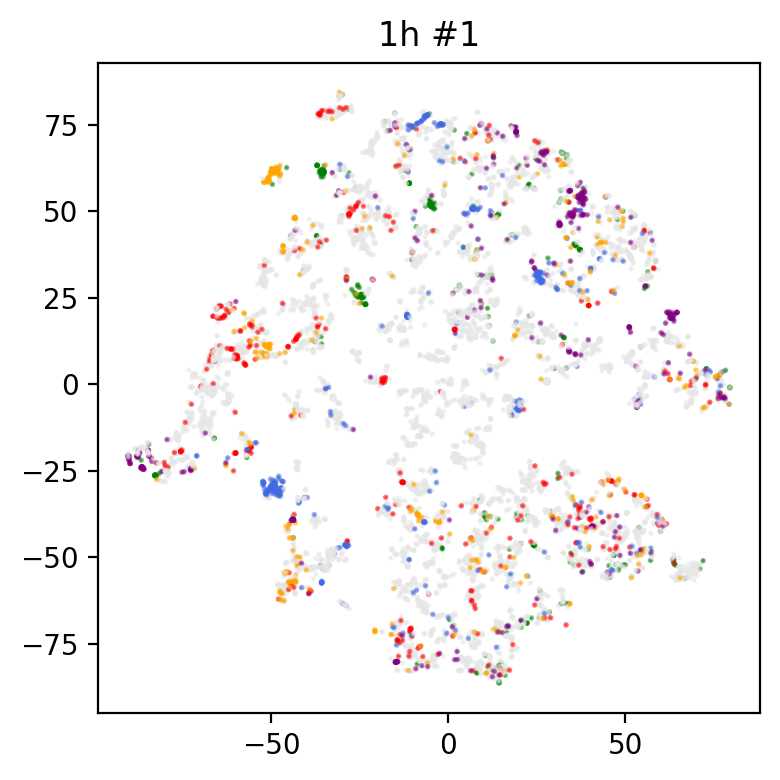

/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


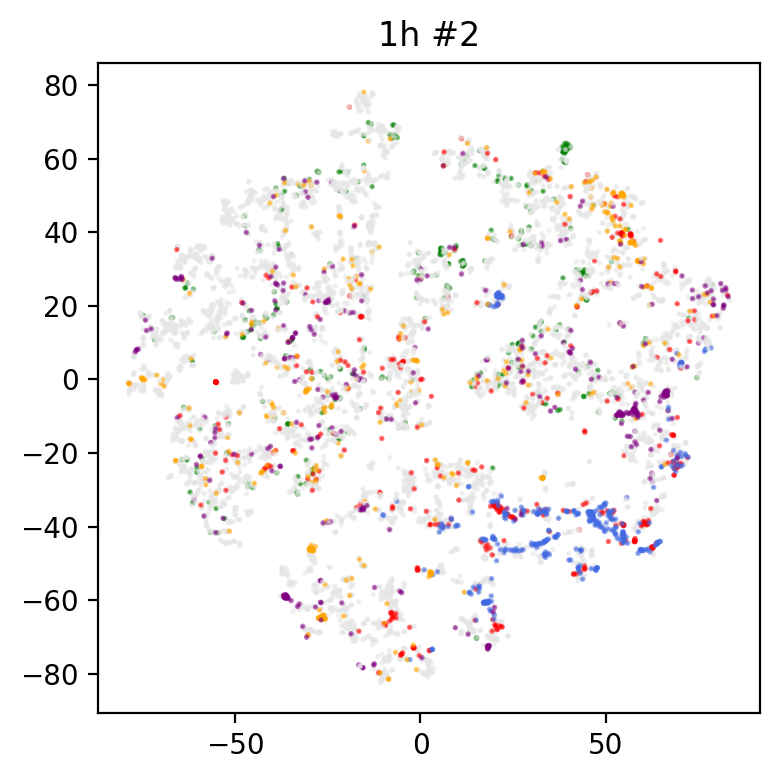

/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


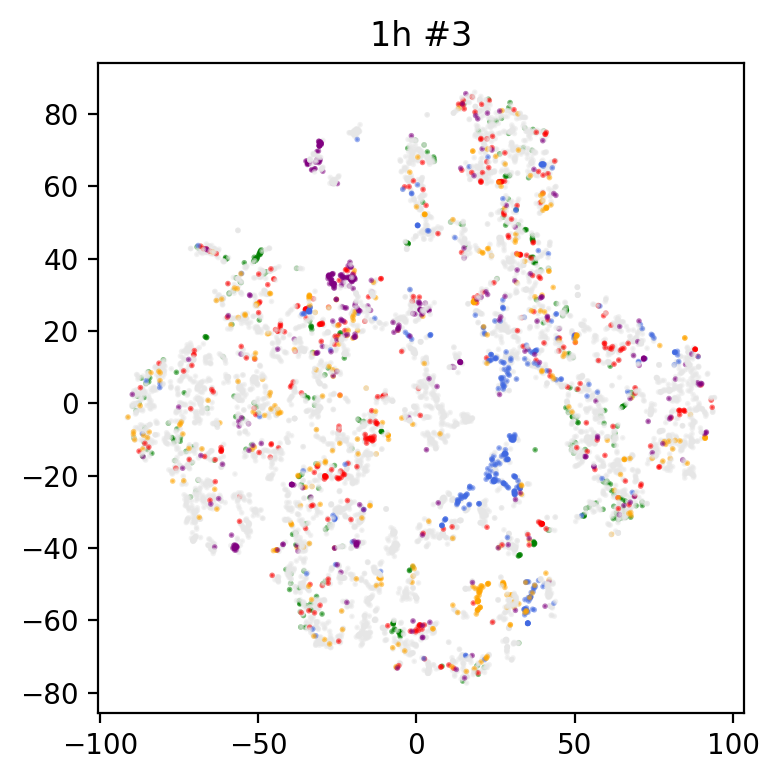

/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


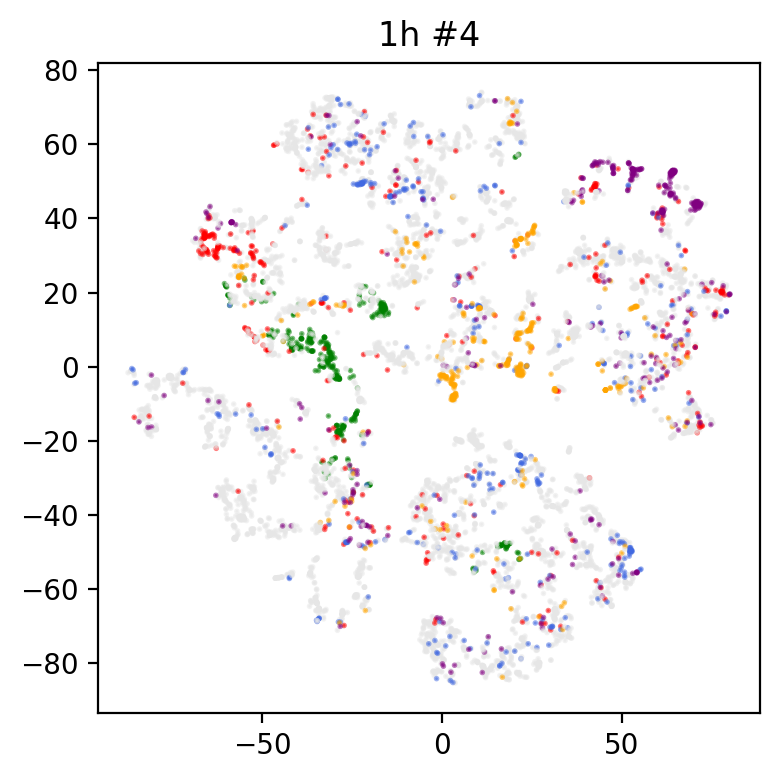

/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


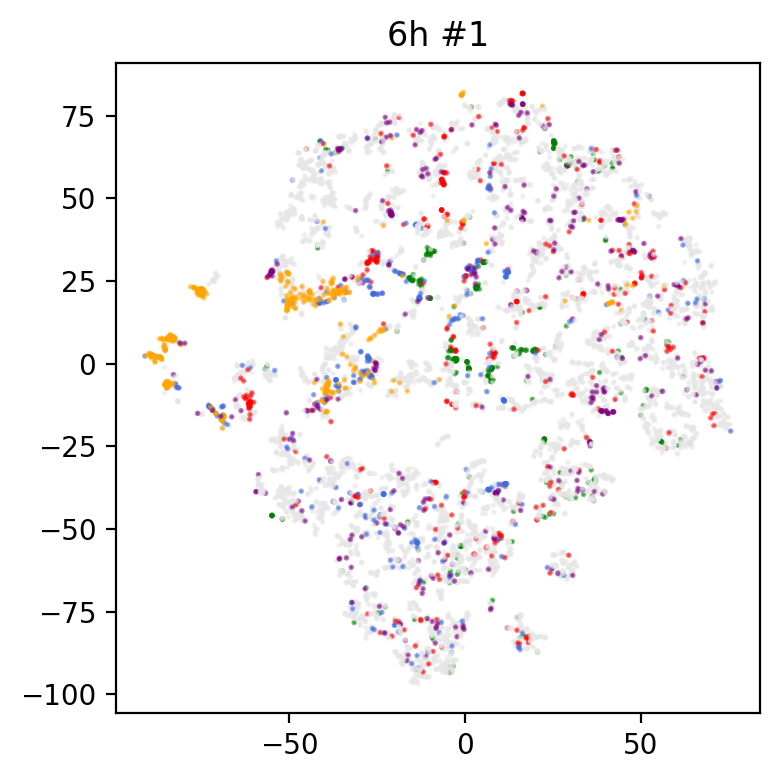

/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


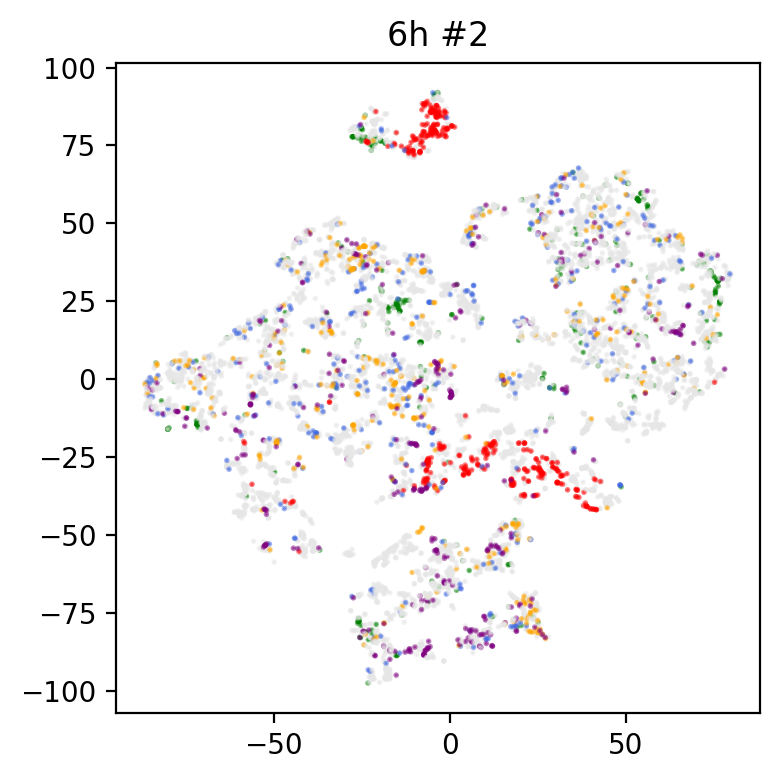

/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


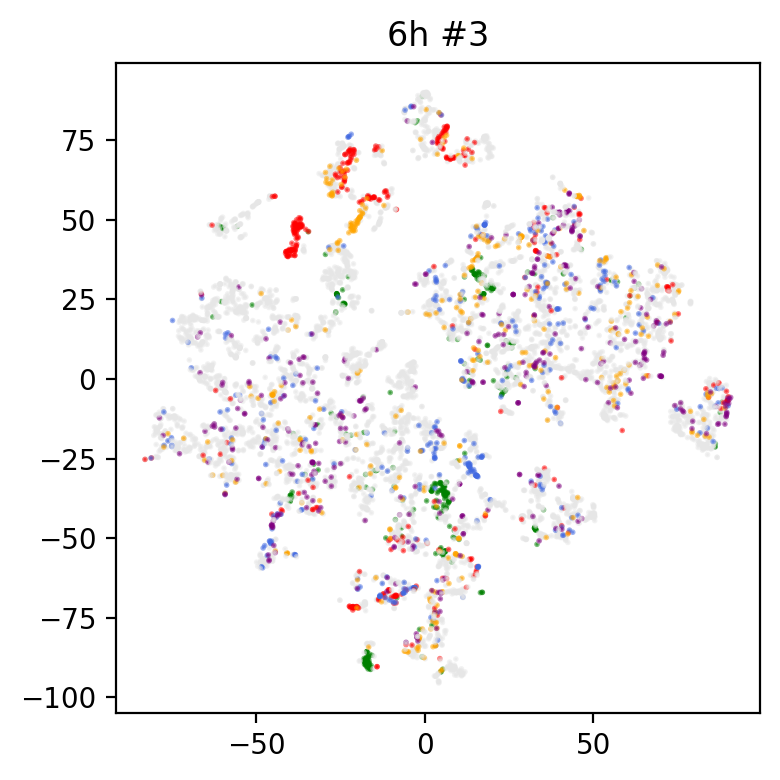

/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


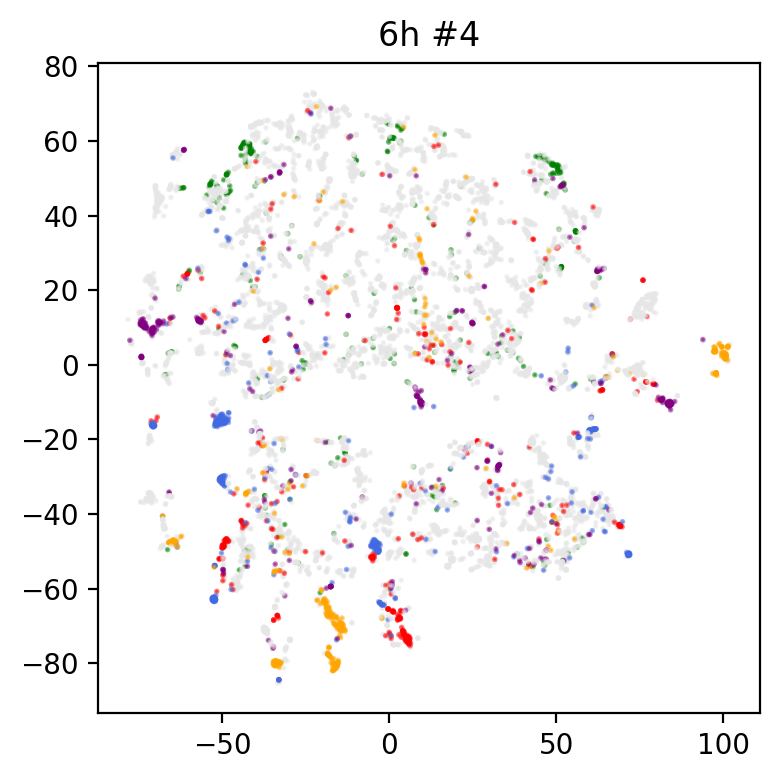

In [2]:
intervals = ['1h', '6h']
count = 4

for interval_index, interval in enumerate(intervals):
    for number in range(1, 5):
        fig, ax = plt.subplots(figsize=(4, 4), dpi=200, tight_layout=True)
        filepath = './resources/extinction/dlc/60min_x1_%s_EXT_%d.csv' % (interval, number)
        
        df = pd.read_csv(filepath, header=[1, 2], index_col=[0])
        
        body_parts = df.columns.get_level_values(0).unique(0).to_list()
        drop_columns = [(body, 'likelihood') for body in body_parts]
        df.drop(drop_columns, axis=1, inplace=True)
        
        xy_df = pd.read_csv('./resources/extinction/dlc/60min_x1_%s_EXT_%d_XY.tsv' % (interval, number), sep="\t", header=[34], index_col=[0])

        polar_df = convert_polar_df(df, xy_df)
        polar_df = polar_df.apply(lambda x: (x-x.mean()) / x.std(), axis=0)

        data = polar_df.to_numpy()
        pca = PCA()
        pca.fit(data)
        feature = pca.transform(data)

        pca_list = feature[:, :6]
    
        tsne = TSNE(n_components=2, metric='cosine')
        x_embedded = tsne.fit_transform(pca_list)
        
        x, y = zip(*x_embedded)
        size = len(polar_df)
        
        colors = ['0.9'] * size
        colors[0:360] = ['green'] * 360
        colors[5040:5400] = ['red'] * 360
        colors[5400:5760] = ['royalblue'] * 360
        colors[5760:6120] = ['orange'] * 360
        colors[6120:6480] = ['purple'] * 360

        ax.scatter(x=x, y=y, s=1.0, c=colors, alpha=.5)
        ax.set_title('%s #%d' % (interval, number))
        plt.show()

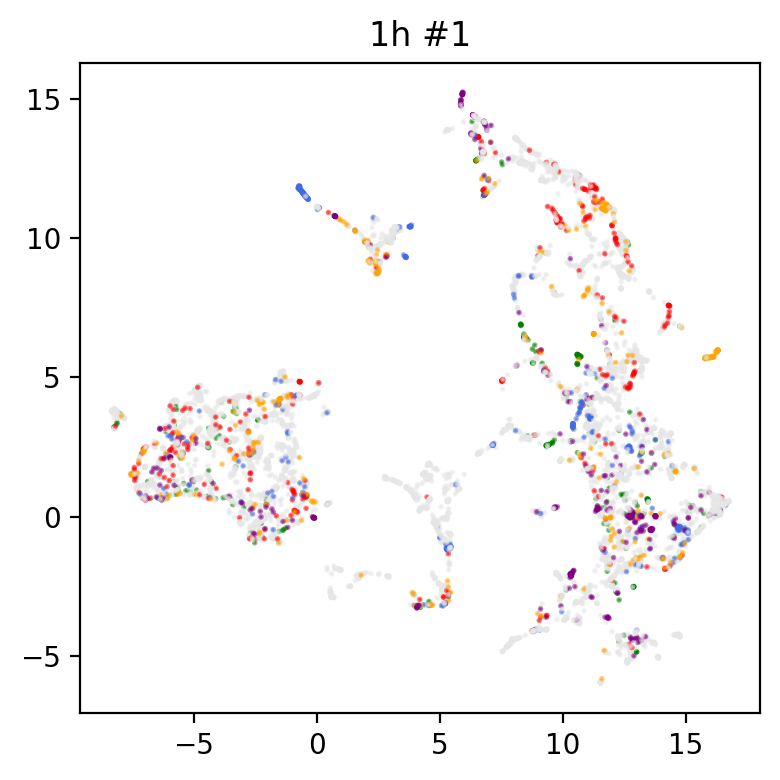

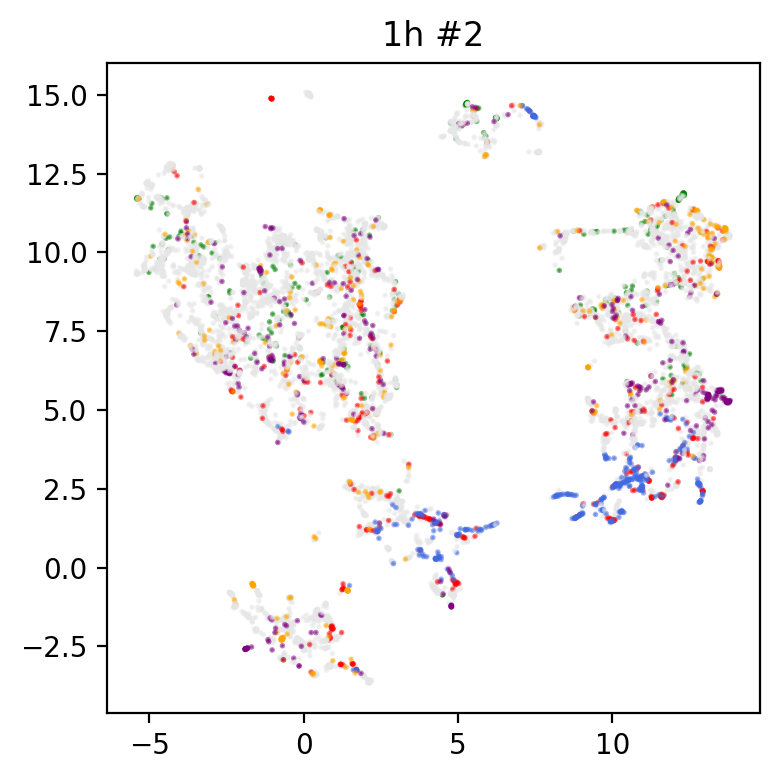

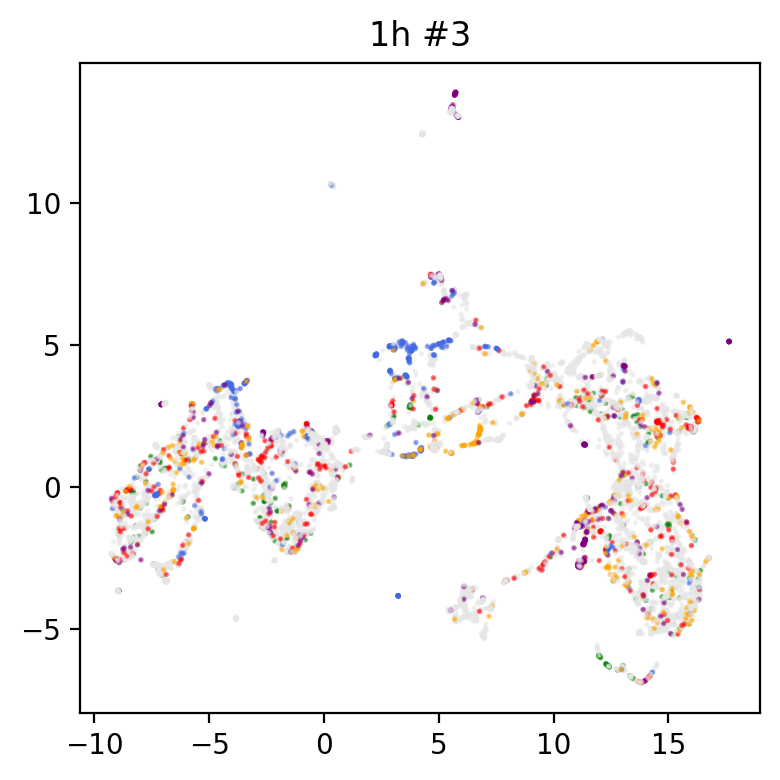

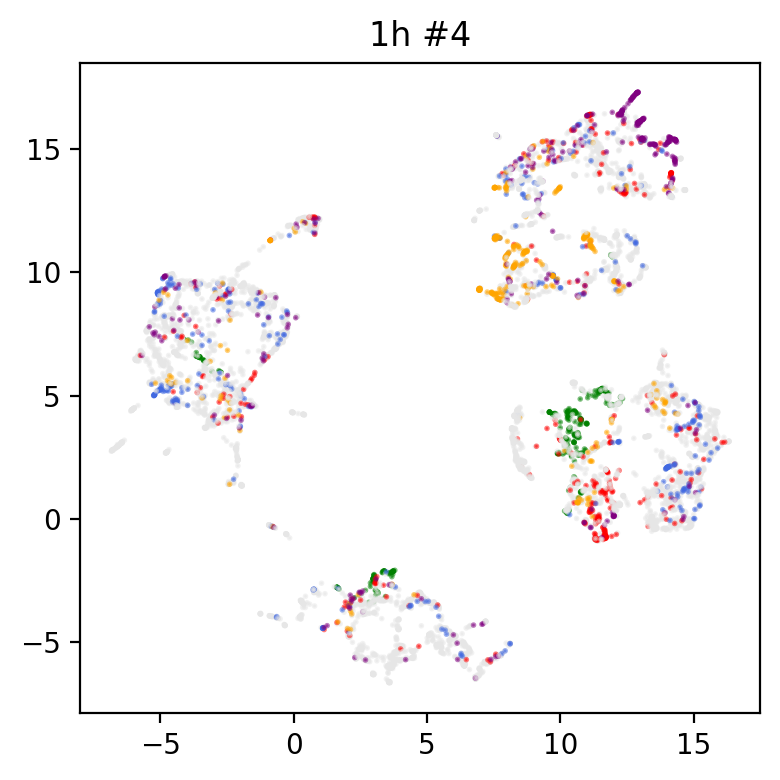

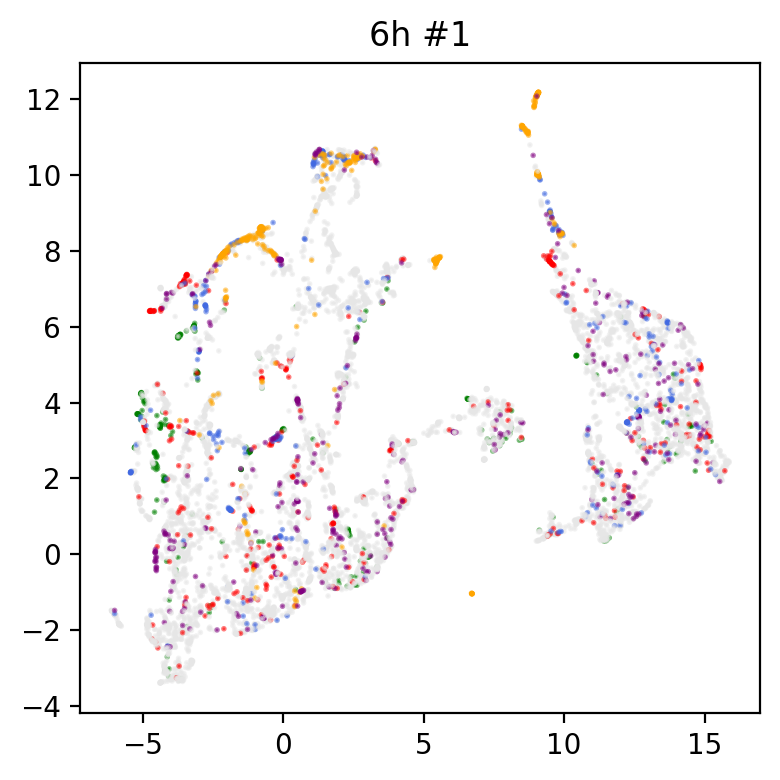

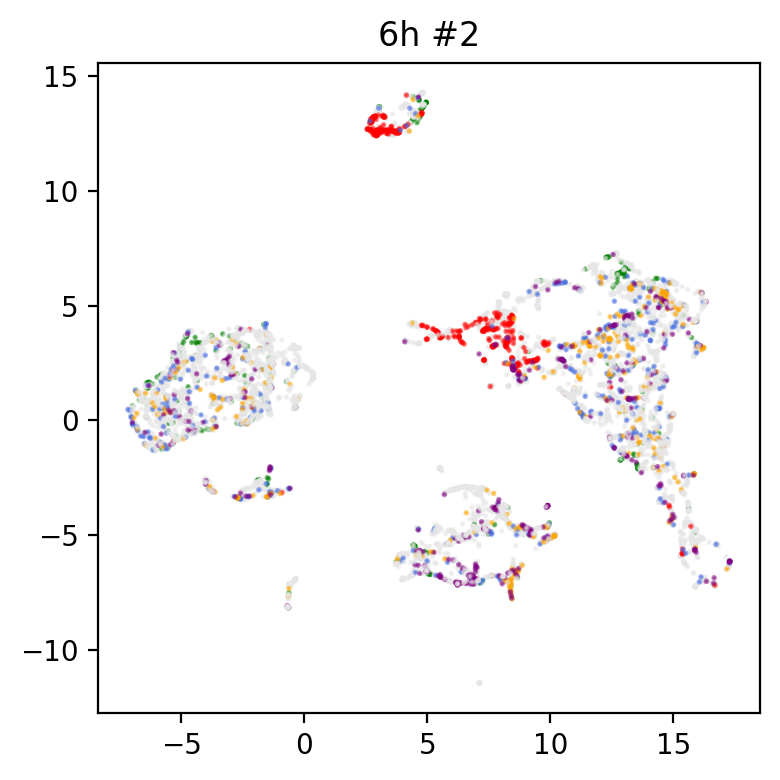

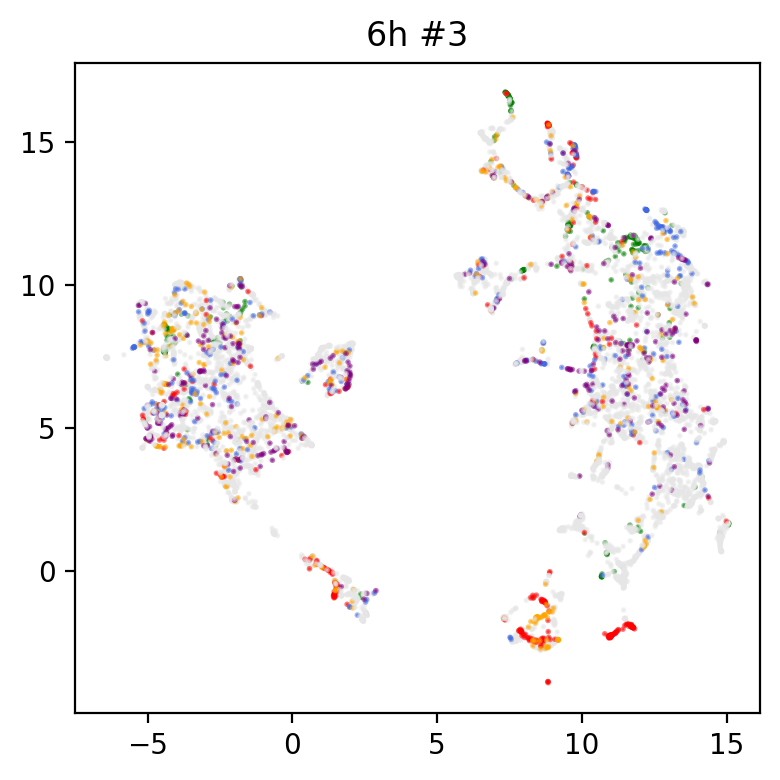

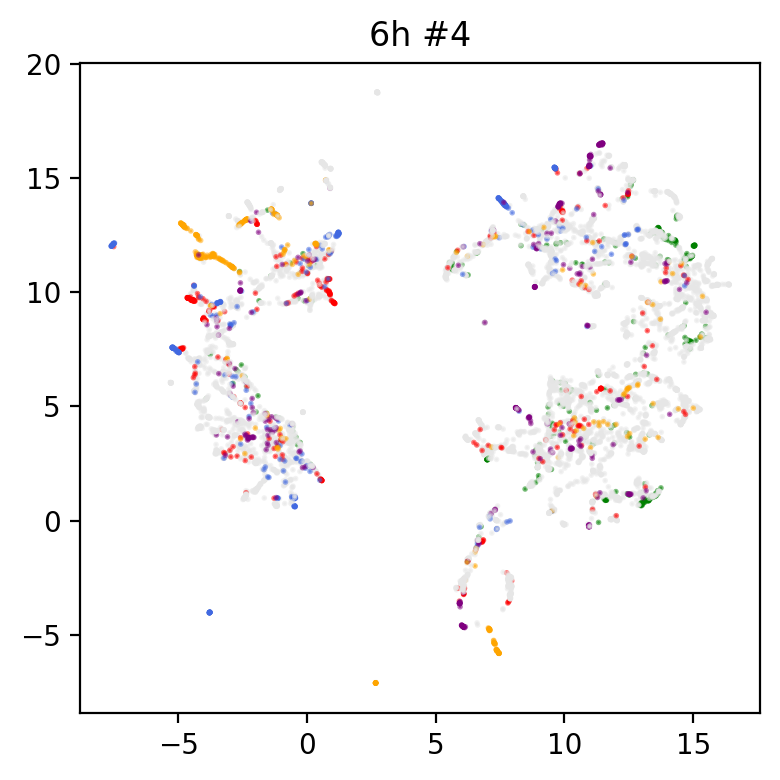

In [3]:
intervals = ['1h', '6h']
count = 4

for interval_index, interval in enumerate(intervals):
    for number in range(1, 5):
        fig, ax = plt.subplots(figsize=(4, 4), dpi=200, tight_layout=True)
        filepath = './resources/extinction/dlc/60min_x1_%s_EXT_%d.csv' % (interval, number)
        
        df = pd.read_csv(filepath, header=[1, 2], index_col=[0])
        
        body_parts = df.columns.get_level_values(0).unique(0).to_list()
        drop_columns = [(body, 'likelihood') for body in body_parts]
        df.drop(drop_columns, axis=1, inplace=True)
        
        xy_df = pd.read_csv('./resources/extinction/dlc/60min_x1_%s_EXT_%d_XY.tsv' % (interval, number), sep="\t", header=[34], index_col=[0])
        
        polar_df = convert_polar_df(df, xy_df)
        polar_df = polar_df.apply(lambda x: (x-x.mean()) / x.std(), axis=0)

        data = polar_df.to_numpy()
        pca = PCA()
        pca.fit(data)
        feature = pca.transform(data)

        pca_list = feature[:, :6]
    
        umap_model = UMAP(n_components=2, metric='cosine')
        x_embedded = umap_model.fit_transform(pca_list)
        
        x, y = zip(*x_embedded)
        size = len(polar_df)
        
        colors = ['0.9'] * size
        colors[0:360] = ['green'] * 360
        colors[5040:5400] = ['red'] * 360
        colors[5400:5760] = ['royalblue'] * 360
        colors[5760:6120] = ['orange'] * 360
        colors[6120:6480] = ['purple'] * 360

        ax.scatter(x=x, y=y, s=1.0, c=colors, alpha=.5)
        ax.set_title('%s #%d' % (interval, number))
        plt.show()

[2.36828257e-01 1.63250428e-01 1.11497666e-01 8.83475243e-02
 6.66740624e-02 4.71074807e-02 4.45402506e-02 3.70907170e-02
 3.36121192e-02 2.78822555e-02 2.34157568e-02 2.27769556e-02
 1.88854165e-02 1.36129974e-02 1.19828054e-02 1.04435576e-02
 8.86404304e-03 6.97487339e-03 6.81866315e-03 4.49371408e-03
 4.33498354e-03 3.42122663e-03 3.19032767e-03 2.15028789e-03
 1.57792311e-03 2.25707791e-04]


/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


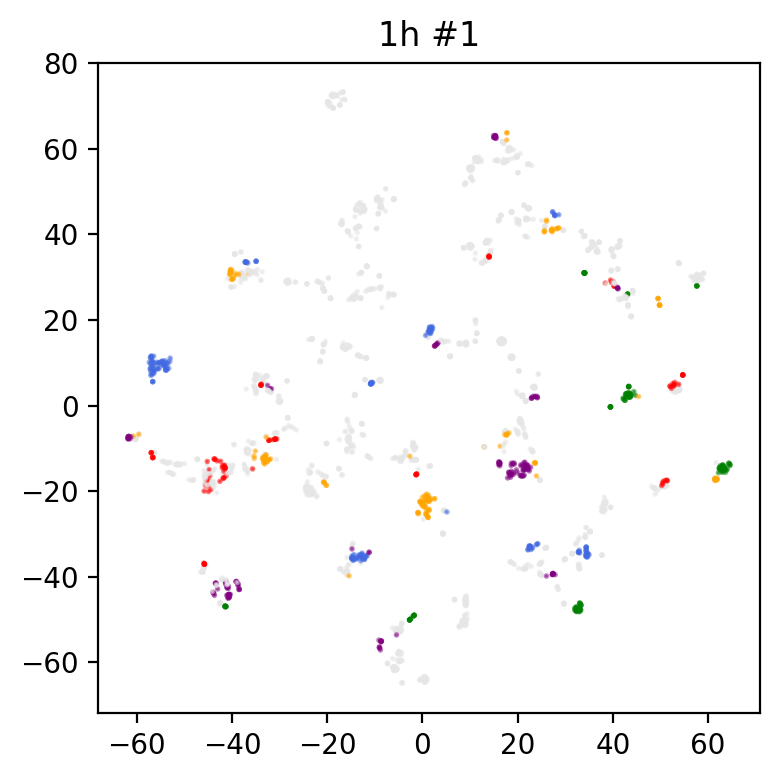

[3.50471103e-01 1.61442412e-01 1.01333871e-01 7.11425642e-02
 4.92997598e-02 4.10287776e-02 3.51693441e-02 3.04681018e-02
 2.39766826e-02 1.98056923e-02 1.81150883e-02 1.69601443e-02
 1.23656198e-02 1.18867309e-02 1.09771794e-02 8.84063560e-03
 7.69899703e-03 6.60007500e-03 6.32907874e-03 4.58984636e-03
 4.24243931e-03 2.49453242e-03 2.23148889e-03 1.40132877e-03
 9.58915751e-04 1.69591378e-04]


/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


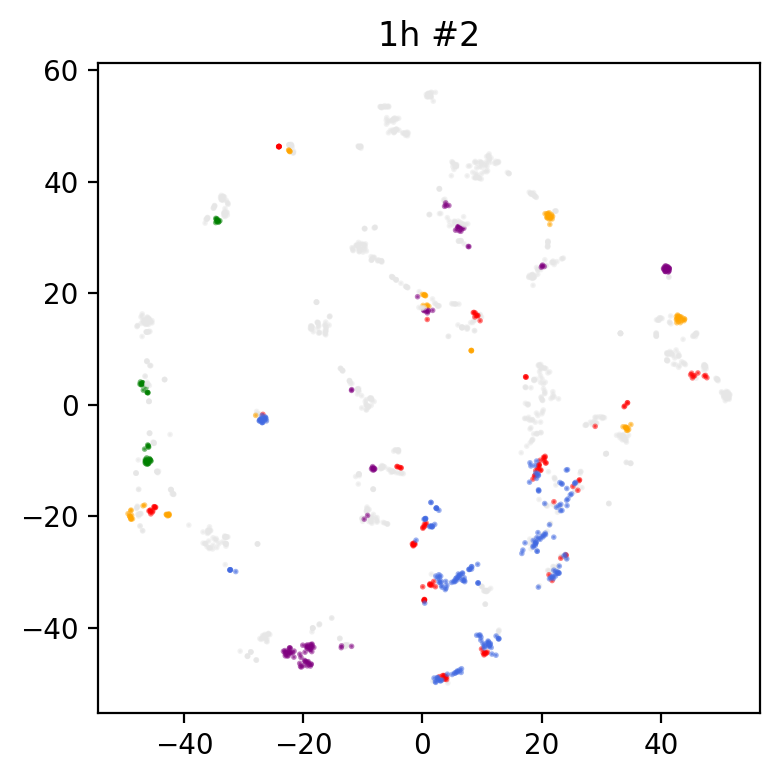

[2.54607275e-01 1.86386887e-01 1.04422150e-01 7.64105023e-02
 7.40096806e-02 5.76584839e-02 5.20051118e-02 3.22232226e-02
 2.78949778e-02 2.49766589e-02 2.00799346e-02 1.49253277e-02
 1.38246909e-02 1.05963427e-02 7.41573577e-03 6.57729948e-03
 6.36485933e-03 5.88107818e-03 5.25962358e-03 5.15316422e-03
 4.49480927e-03 3.02391097e-03 2.63848712e-03 1.86168793e-03
 1.20531853e-03 1.02780420e-04]


/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


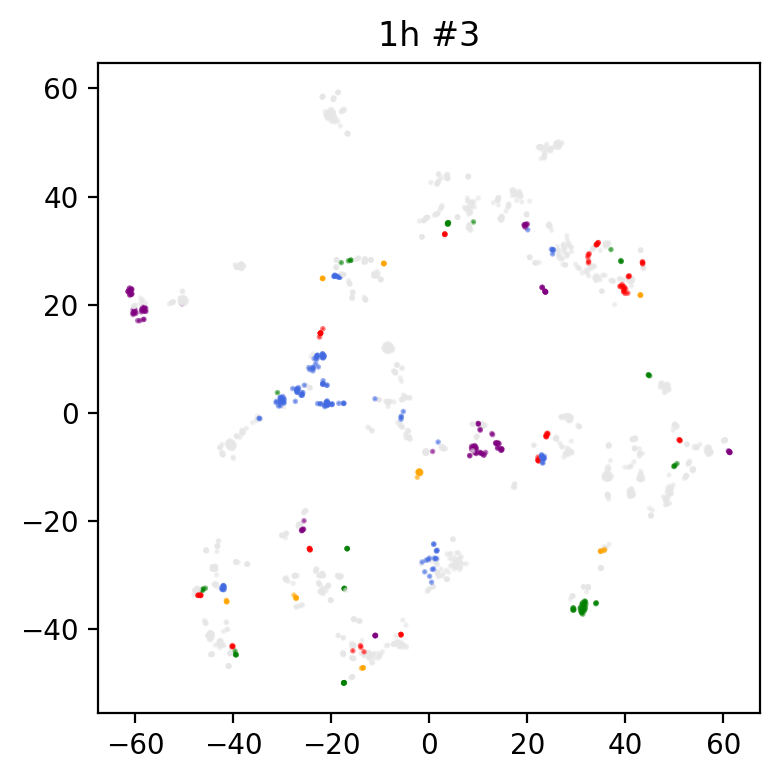

[3.05721579e-01 1.67545489e-01 1.45256627e-01 9.82972106e-02
 5.27238694e-02 5.04821241e-02 4.49185363e-02 2.69605589e-02
 2.12825616e-02 1.85589198e-02 1.19209447e-02 1.06719270e-02
 7.38215710e-03 6.36410874e-03 5.75076992e-03 5.14329206e-03
 4.03754348e-03 3.47157595e-03 3.36667624e-03 2.80398648e-03
 2.53414767e-03 1.96747321e-03 1.27019147e-03 7.43162865e-04
 6.54342652e-04 1.70225407e-04]


/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


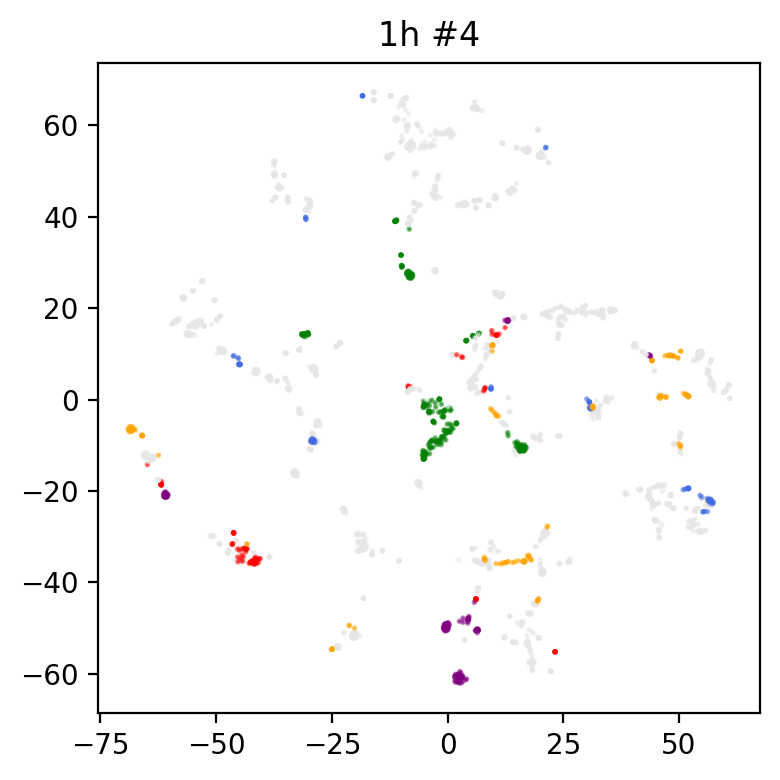

[3.40980149e-01 1.92289930e-01 8.72714415e-02 8.18941556e-02
 5.43559980e-02 3.96550274e-02 3.63402264e-02 3.30763424e-02
 2.25622902e-02 2.00558945e-02 1.73728881e-02 1.25591204e-02
 1.11294559e-02 1.06622492e-02 6.78960809e-03 6.65456547e-03
 5.85724123e-03 5.36913698e-03 4.15510875e-03 3.05782107e-03
 2.22314970e-03 2.09376557e-03 1.51278800e-03 9.69532080e-04
 8.63907838e-04 2.48206840e-04]


/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


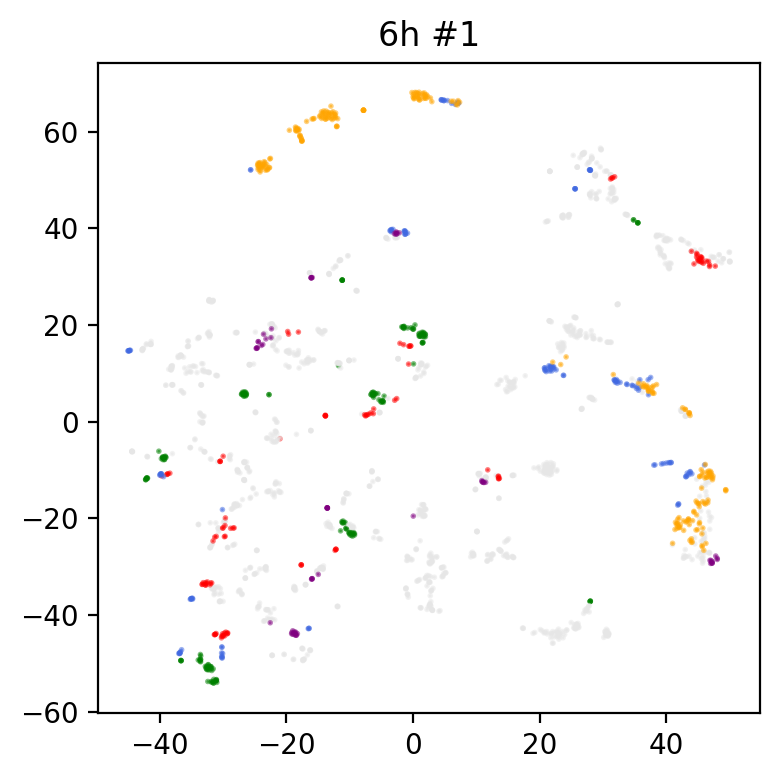

[1.77345239e-01 1.36353821e-01 1.22006608e-01 1.12128660e-01
 9.44015213e-02 8.25146375e-02 5.04922725e-02 3.97991581e-02
 2.85331221e-02 2.59240572e-02 2.37683969e-02 2.20372151e-02
 1.57642844e-02 1.10572082e-02 8.68556052e-03 7.94089105e-03
 7.65626384e-03 7.58179400e-03 6.15409590e-03 5.14661678e-03
 4.65904131e-03 4.27228753e-03 2.83091610e-03 1.76113296e-03
 1.07302270e-03 1.12176593e-04]


/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


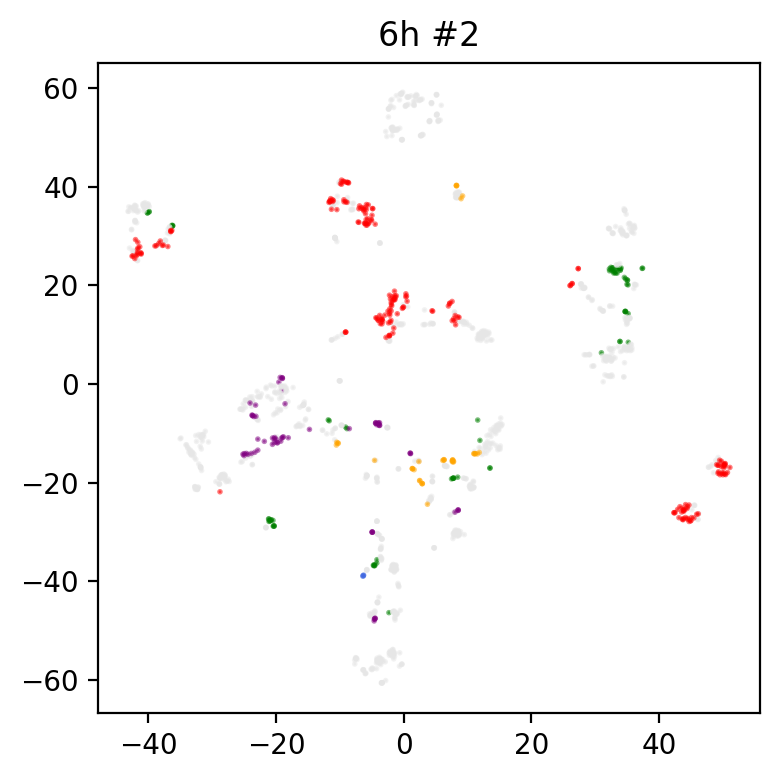

[2.72726739e-01 2.42174684e-01 9.92168559e-02 8.24897505e-02
 5.98095073e-02 4.64812546e-02 3.19935165e-02 2.80552513e-02
 2.50482165e-02 1.64793789e-02 1.38373590e-02 1.20144492e-02
 9.84679771e-03 9.54828998e-03 8.49150154e-03 7.36262695e-03
 6.83492525e-03 6.15608561e-03 5.89368467e-03 4.45789724e-03
 2.95995490e-03 2.82248435e-03 2.19269008e-03 1.73901160e-03
 1.23246442e-03 1.34622916e-04]


/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


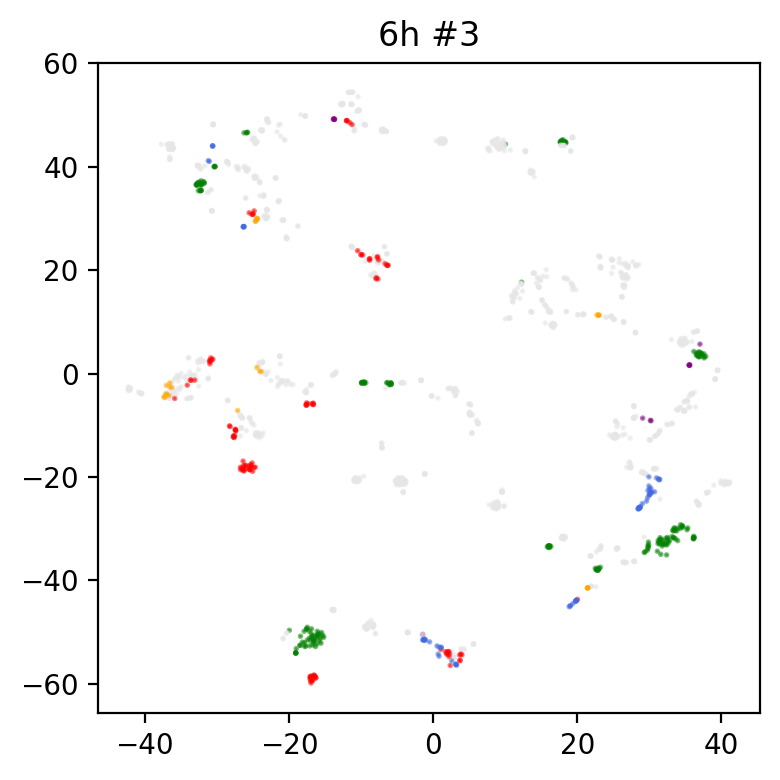

[3.50739156e-01 2.19361740e-01 1.30269696e-01 7.53248883e-02
 4.46152731e-02 4.18925279e-02 2.27478182e-02 2.01816383e-02
 1.50143520e-02 1.41620754e-02 1.20755408e-02 9.89191658e-03
 7.98965377e-03 6.06362702e-03 5.54060922e-03 5.17445864e-03
 4.14223727e-03 3.50242745e-03 2.78163621e-03 2.22672319e-03
 1.74216019e-03 1.69688901e-03 1.36708332e-03 9.01395923e-04
 4.49207747e-04 1.45269603e-04]


/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


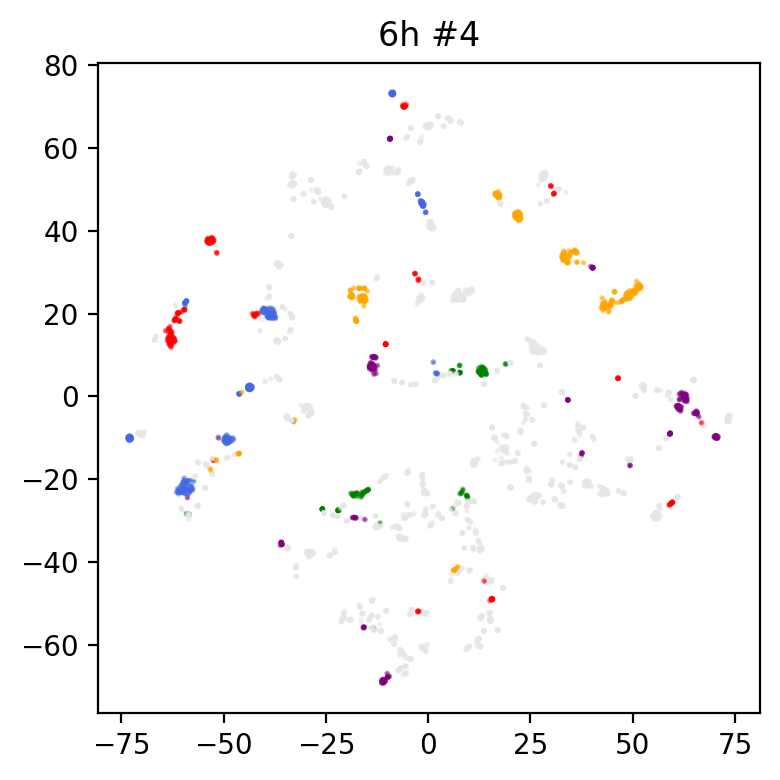

In [4]:
intervals = ['1h', '6h']
count = 4

for interval_index, interval in enumerate(intervals):
    for number in range(1, 5):
        fig, ax = plt.subplots(figsize=(4, 4), dpi=200, tight_layout=True)
        filepath = './resources/extinction/dlc/60min_x1_%s_EXT_%d.csv' % (interval, number)
        
        df = pd.read_csv(filepath, header=[1, 2], index_col=[0])
        
        bodyparts = list(set([body for (body, value) in df.columns]))
        drop_columns = [(body, 'likelihood') for body in bodyparts]
        df.drop(drop_columns, axis=1, inplace=True)
        
        xy_df = pd.read_csv('./resources/extinction/dlc/60min_x1_%s_EXT_%d_XY.tsv' % (interval, number), sep="\t", header=[34], index_col=[0])
        freezing_series = fetch_freezing_frames(xy_df)

        polar_df = convert_polar_df(df, xy_df)
        polar_df = polar_df.apply(lambda x: (x - x.mean()) / x.std())

        freezing_index = freezing_series[freezing_series == 1].index
        freezing_df = polar_df.iloc[freezing_index, :]
        
        data = freezing_df.to_numpy()
        pca = PCA()
        pca.fit(data)
        feature = pca.transform(data)
        print(pca.explained_variance_ratio_)

        pca_list = feature[:, :9]

        tsne = TSNE(n_components=2, metric='cosine')
        x_embedded = tsne.fit_transform(pca_list)
        x_embedded
        
        x, y = zip(*x_embedded)
        
        size = len(df)
        
        index_series = pd.Series(freezing_df.index)
        freezing_size = len(index_series[index_series <= 360])
        sleeping_size = len(index_series[index_series > 360])
        colors = ['green'] * freezing_size + ['0.9'] * sleeping_size
        colors = ['red' if df_index >= 5040 and df_index < 5400 else colors[i] for i, df_index in enumerate(index_series)]
        colors = ['royalblue' if df_index >= 5400 and df_index < 5760 else colors[i] for i, df_index in enumerate(index_series)]
        colors = ['orange' if df_index >= 5760 and df_index < 6120 else colors[i] for i, df_index in enumerate(index_series)]
        colors = ['purple' if df_index >= 6120 and df_index < 6480 else colors[i] for i, df_index in enumerate(index_series)]

        ax.scatter(x=x, y=y, s=1.0, c=colors, alpha=.5)
        
        ax.set_title('%s #%d' % (interval, number))
        plt.show()

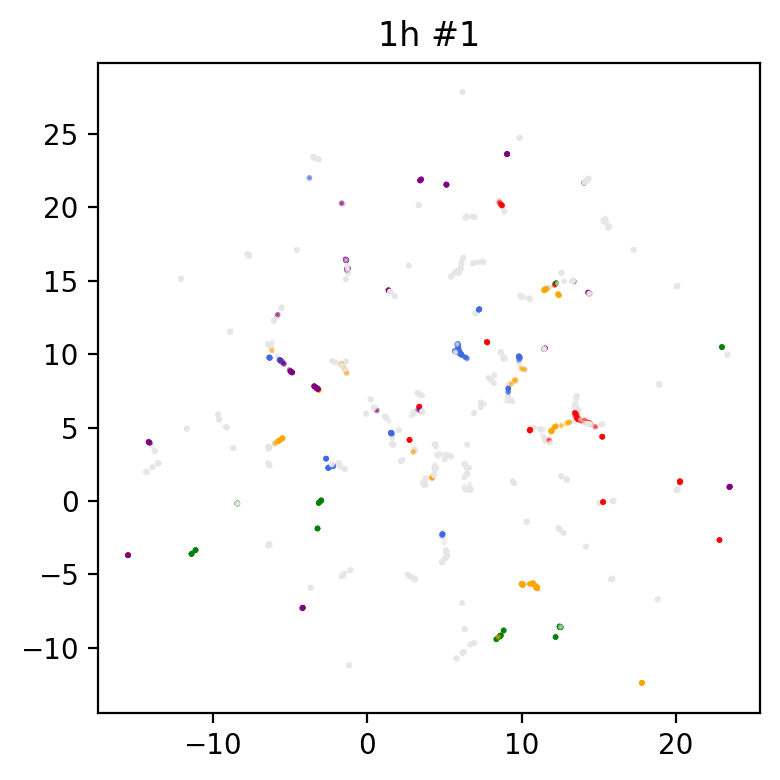

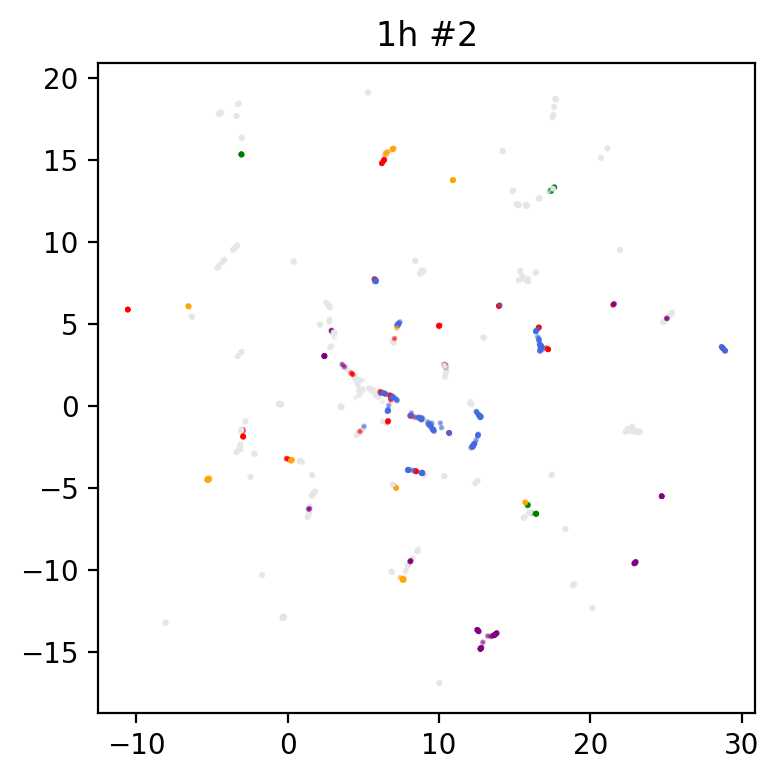

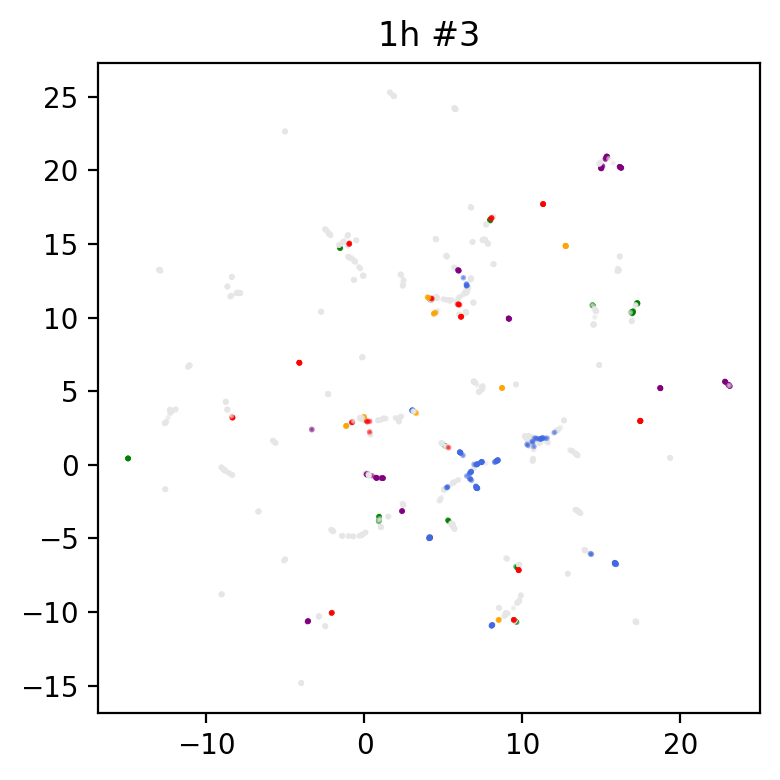

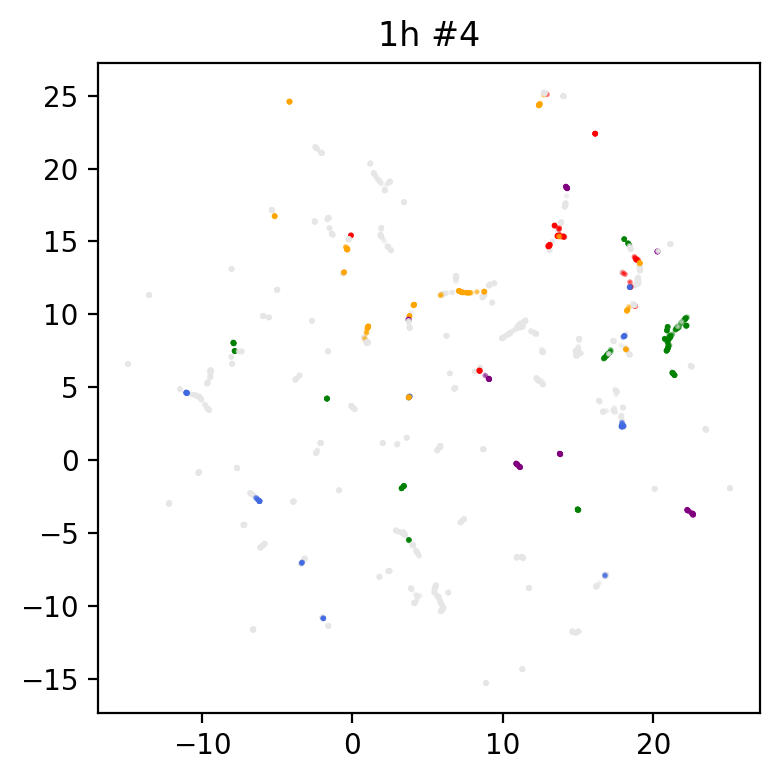

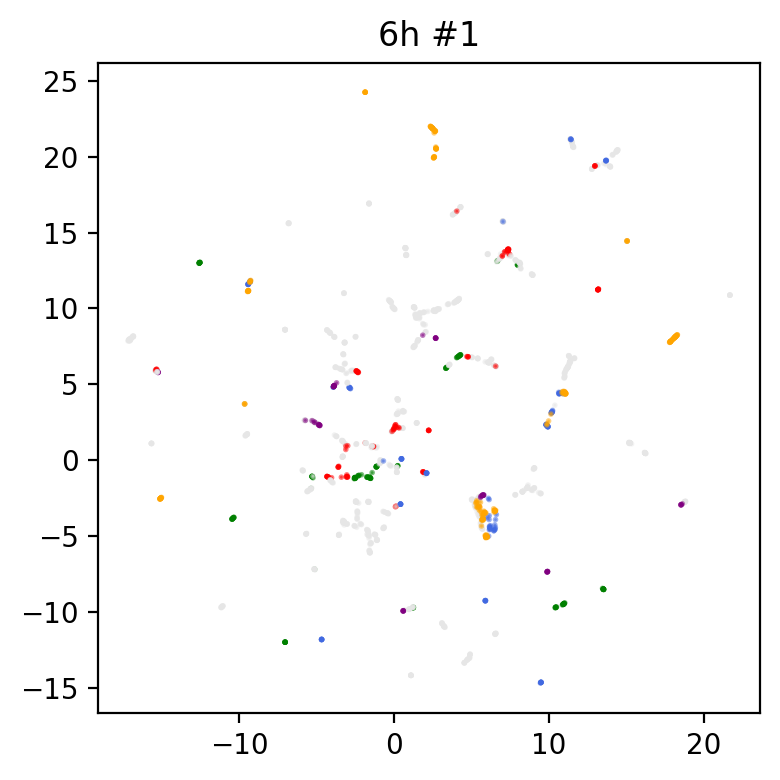

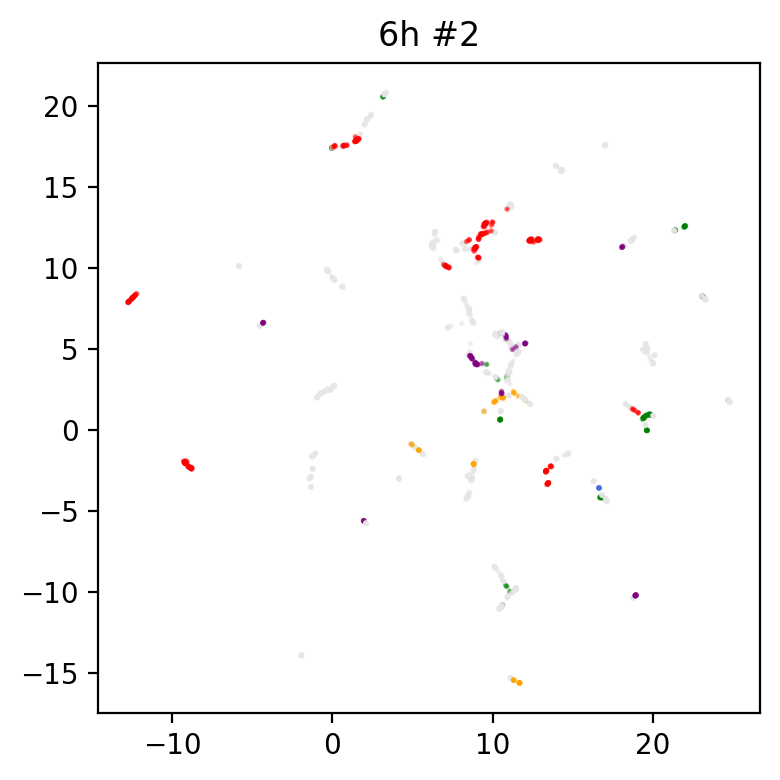

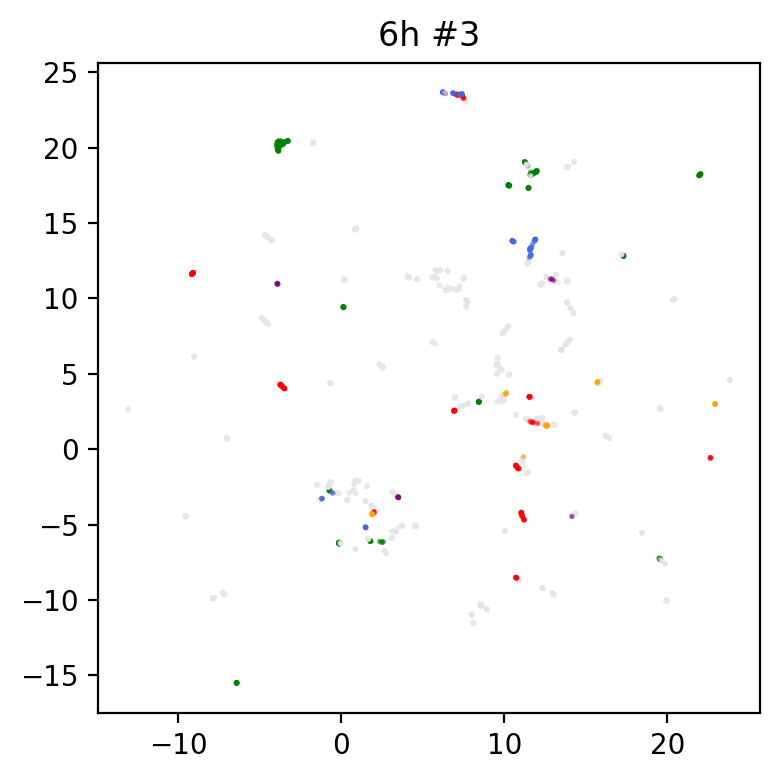

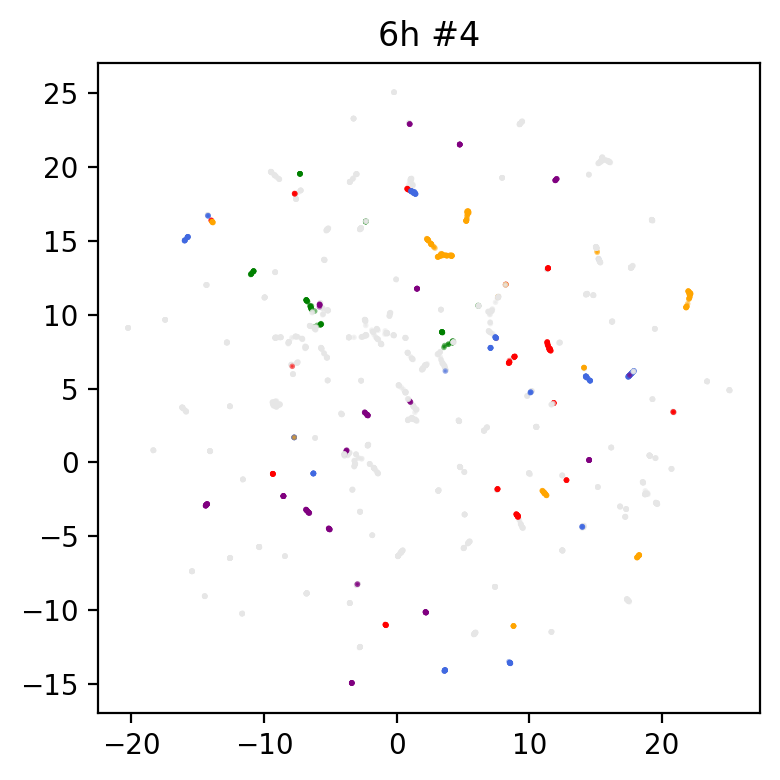

In [5]:
intervals = ['1h', '6h']
count = 4

for interval_index, interval in enumerate(intervals):
    for number in range(1, 5):
        fig, ax = plt.subplots(figsize=(4, 4), dpi=200, tight_layout=True)
        filepath = './resources/extinction/dlc/60min_x1_%s_EXT_%d.csv' % (interval, number)
        
        df = pd.read_csv(filepath, header=[1, 2], index_col=[0])
        
        bodyparts = list(set([body for (body, value) in df.columns]))
        drop_columns = [(body, 'likelihood') for body in bodyparts]
        df.drop(drop_columns, axis=1, inplace=True)
        
        xy_df = pd.read_csv('./resources/extinction/dlc/60min_x1_%s_EXT_%d_XY.tsv' % (interval, number), sep="\t", header=[34], index_col=[0])
        freezing_series = fetch_freezing_frames(xy_df)

        polar_df = convert_polar_df(df, xy_df)
        polar_df = polar_df.apply(lambda x: (x - x.mean()) / x.std())

        freezing_index = freezing_series[freezing_series == 1].index
        freezing_df = polar_df.iloc[freezing_index, :]
        
        data = freezing_df.to_numpy()
        #pca = PCA()
        #pca.fit(data)
        #feature = pca.transform(data)
        #pca_list = feature[:, :9]

        umap = UMAP(n_components=2, metric='cosine')
        x_embedded = umap.fit_transform(data)
        x_embedded
        
        x, y = zip(*x_embedded)
        
        size = len(df)
        
        index_series = pd.Series(freezing_df.index)
        freezing_size = len(index_series[index_series <= 360])
        sleeping_size = len(index_series[index_series > 360])
        colors = ['green'] * freezing_size + ['0.9'] * sleeping_size
        colors = ['red' if df_index >= 5040 and df_index < 5400 else colors[i] for i, df_index in enumerate(index_series)]
        colors = ['royalblue' if df_index >= 5400 and df_index < 5760 else colors[i] for i, df_index in enumerate(index_series)]
        colors = ['orange' if df_index >= 5760 and df_index < 6120 else colors[i] for i, df_index in enumerate(index_series)]
        colors = ['purple' if df_index >= 6120 and df_index < 6480 else colors[i] for i, df_index in enumerate(index_series)]

        ax.scatter(x=x, y=y, s=1.0, c=colors, alpha=.5)
        
        ax.set_title('%s #%d' % (interval, number))
        plt.show()